# Examen Dionicio de Citibanamex

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('superstore.csv')

In [5]:
df.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


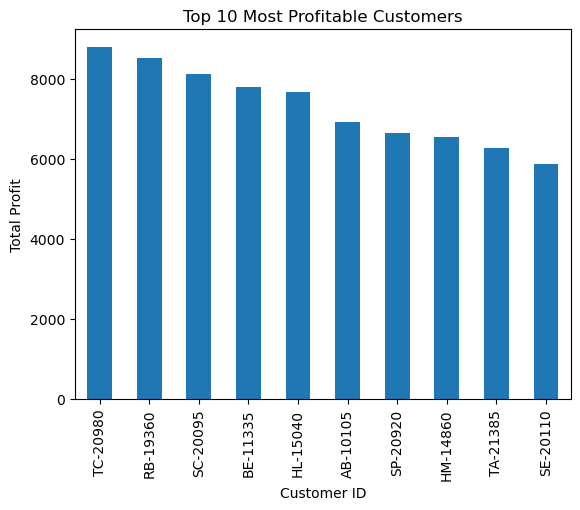

In [10]:
# Group by customer_id and calculate total profit
customer_profit = df.groupby('customer_id')['profit'].sum()

# Sort customers by profit in descending order
sorted_customers = customer_profit.sort_values(ascending=False)

# Plot the top 10 most profitable customers
top_customers = sorted_customers.head(10)
top_customers.plot(kind='bar', xlabel='Customer ID', ylabel='Total Profit', title='Top 10 Most Profitable Customers')
plt.show()

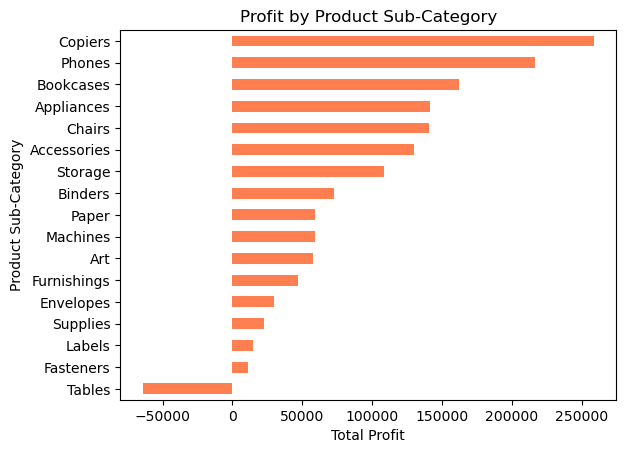

In [7]:
# Group by sub-category and calculate total profit for each sub-category
subcategory_data = df.groupby('sub-category')['profit'].sum().sort_values()

# Plot the results
subcategory_data.plot(kind='barh', color='coral')
plt.xlabel('Total Profit')
plt.ylabel('Product Sub-Category')
plt.title('Profit by Product Sub-Category')
plt.show()

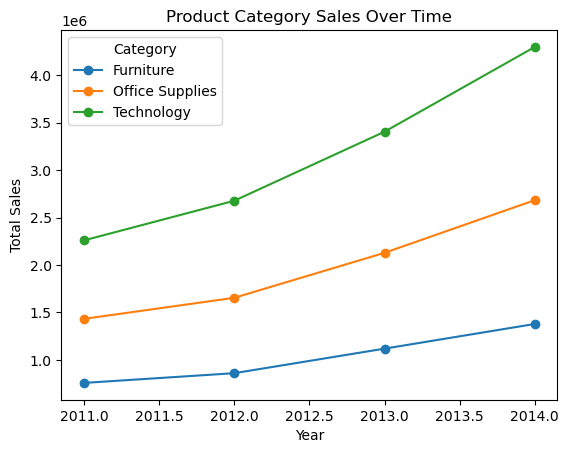

In [11]:
# Convert 'order_date' to datetime type
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year from 'order_date'
df['year'] = df['order_date'].dt.year

# Group by year and category, then calculate total sales
category_sales_over_time = df.groupby(['year', 'category'])['sales'].sum().unstack()

# Plot the trend for each product category as a stacked line plot
category_sales_over_time.plot(kind='line', marker='o', xlabel='Year', ylabel='Total Sales', title='Product Category Sales Over Time', stacked=True)
plt.legend(title='Category', loc='upper left')
plt.show()

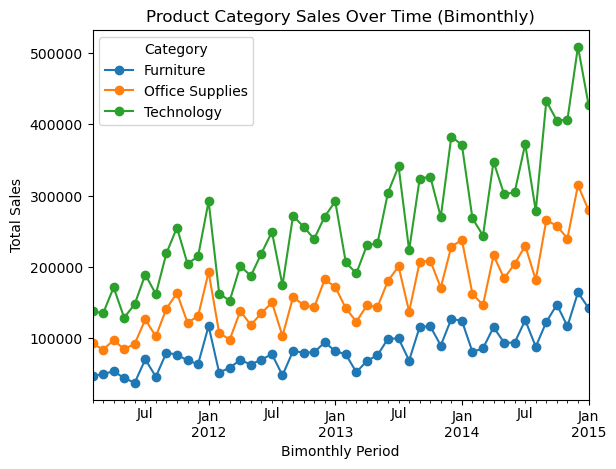

In [12]:
# Convert 'order_date' to datetime type
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract bimonthly period from 'order_date'
df['bimonthly_period'] = df['order_date'].dt.to_period("2M")

# Group by bimonthly period and category, then calculate total sales
category_sales_over_time = df.groupby(['bimonthly_period', 'category'])['sales'].sum().unstack()

# Plot the trend for each product category as a stacked line plot
category_sales_over_time.plot(kind='line', marker='o', xlabel='Bimonthly Period', ylabel='Total Sales', title='Product Category Sales Over Time (Bimonthly)', stacked=True)
plt.legend(title='Category', loc='upper left')
plt.show()

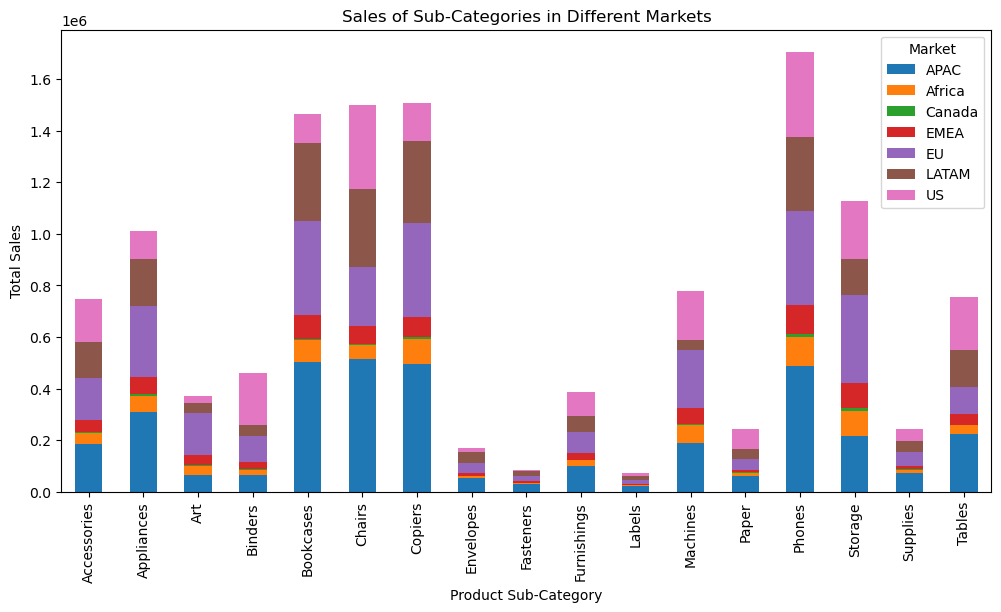

In [9]:
# Group by market, sub-category and calculate total sales for each group
market_subcategory_data = df.groupby(['market', 'sub-category'])['sales'].sum().unstack('market').fillna(0)

# Plot the results
market_subcategory_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')
plt.title('Sales of Sub-Categories in Different Markets')
plt.legend(title='Market')
plt.show()

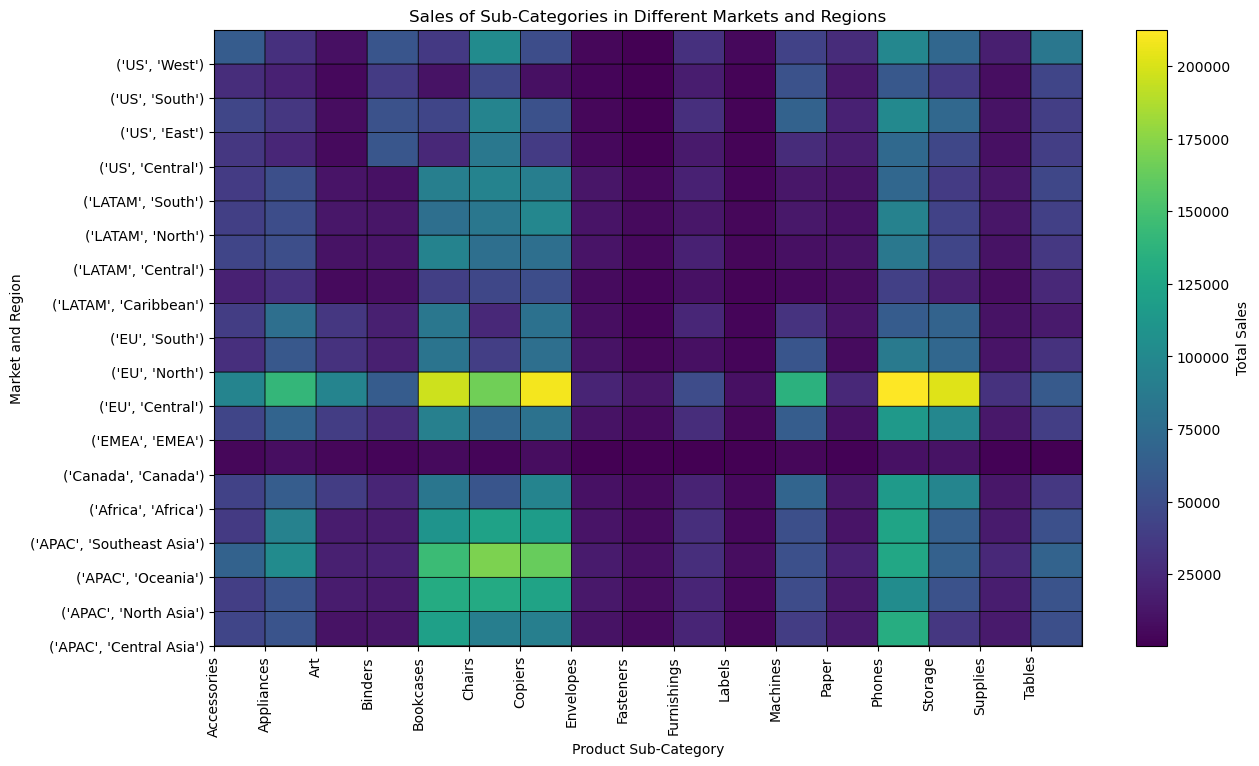

In [13]:
# Group by market, region, and sub-category, then calculate total sales
market_region_subcategory_sales = df.groupby(['market', 'region', 'sub-category'])['sales'].sum().unstack()

# Plot a heatmap for sales of different sub-categories in different markets and regions
plt.figure(figsize=(14, 8))
plt.pcolor(market_region_subcategory_sales, cmap='viridis', edgecolors='k', linewidths=0.5)
plt.colorbar(label='Total Sales')
plt.xlabel('Product Sub-Category')
plt.ylabel('Market and Region')
plt.title('Sales of Sub-Categories in Different Markets and Regions')
plt.xticks(range(len(market_region_subcategory_sales.columns)), market_region_subcategory_sales.columns, rotation='vertical')
plt.yticks(range(len(market_region_subcategory_sales.index)), market_region_subcategory_sales.index)
plt.show()